# Sentiment Analysis Pipeline for Reviews

1. Normalize Reviews
2. Preprocess Reviews for Sentiment Analysis
3. Sentiment Analysis
4. Exploratory Data Analysis

In [1]:
# Imports
import pandas as pd
import os
# google cloud platform key
# os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="sdcsentiment-584f24f06d91.json"
# from google.cloud import language_v1

from preprocess_sentiment import preprocess_sentiment
from get_sentiment import get_sentiment_gcp
from normalize_data import normalize_reviews
import analysis_func as af

Using Singapore server backend.


## 1. Normalize Reviews
1.	Removing duplicated rows
2.	Normalize date to year
3.	Normalize ratings to 10

In [2]:
# Output filename for export
output_filename = "attractions_master_sentiment.xlsx"
# Enter raw data filepath
df = normalize_reviews("attractions_master.xlsx")
df.head()

user  date rating  \
0           desuka Panjaitan  2021     10   
1      Riska Septi Damayanti  2021     10   
2  Mochamad Naufal Irfansyah  2021     10   
3                      T1y25  2022     10   
4               Rengga Utami  2021     10   

                                              review  \
0  Belum Pernah Masuk kedalam, hanya diluar saja....   
1  Sumpahh kalo ke Singapore wajib banget ke sini...   
2  Seru bisa jajan coklat enak dan murah, kalo ma...   
3   Luas banget,banyak spot fotonya,wahananya keren²   
4  Wahana Sangat Lengkap ₩Pokoknya Tempatnya Luar...   

                                            page_url date_scraped  \
0  https://www.google.com/search?q=universal+stud...   2022-04-27   
1  https://www.google.com/search?q=universal+stud...   2022-04-27   
2  https://www.google.com/search?q=universal+stud...   2022-04-27   
3  https://www.google.com/search?q=universal+stud...   2022-04-27   
4  https://www.google.com/search?q=universal+stud...   2022-04-27   

           source attraction  
0  google_reviews        uss  
1  google_reviews        uss  
2  google_reviews        uss  
3  google_reviews        uss  
4  google_reviews        uss

## 2. Pre-processing for Sentiment Analysis

  - Lowercasing reviews
  - Demoji and translate to Bahasa Indonesia
  - Remove punctuation and symbols
  - Fix slang words
  - Summarize reviews with more than 1536 characters
  - Stemming
  - Remove stop words

In [3]:
# Drop irrelevant columns
df.drop(['user','page_url','date_scraped'], axis=1, inplace=True)
df.head()

date rating                                             review  \
0  2021     10  Belum Pernah Masuk kedalam, hanya diluar saja....   
1  2021     10  Sumpahh kalo ke Singapore wajib banget ke sini...   
2  2021     10  Seru bisa jajan coklat enak dan murah, kalo ma...   
3  2022     10   Luas banget,banyak spot fotonya,wahananya keren²   
4  2021     10  Wahana Sangat Lengkap ₩Pokoknya Tempatnya Luar...   

           source attraction  
0  google_reviews        uss  
1  google_reviews        uss  
2  google_reviews        uss  
3  google_reviews        uss  
4  google_reviews        uss

In [4]:
# pre-processing runtime: 14m 45.1s
preprocess_sentiment(df)

In [5]:
# Rearrange dataframe
df = df[['date', 'source', 'review', 'new_reviews', 'attraction', 'rating']]
df.head()

date          source                                             review  \
0  2021  google_reviews  Belum Pernah Masuk kedalam, hanya diluar saja....   
1  2021  google_reviews  Sumpahh kalo ke Singapore wajib banget ke sini...   
2  2021  google_reviews  Seru bisa jajan coklat enak dan murah, kalo ma...   
3  2022  google_reviews   Luas banget,banyak spot fotonya,wahananya keren²   
4  2021  google_reviews  Wahana Sangat Lengkap ₩Pokoknya Tempatnya Luar...   

                                         new_reviews attraction rating  
0  masuk dalam poto dluar senang time moga duit t...        uss     10  
1  sumpahh singapore wajib banget gk rugi harga t...        uss     10  
2  seru jajan coklat enak murah masuk universal 7...        uss     10  
3                 luas banget spot foto wahana keren        uss     10  
4                  wahana lengkap pokok suka excited        uss     10

## Sentiment Analysis

In [6]:
# sentiment analysis runtime: 17m 0.4s
df['sentiment'] = df['new_reviews'].apply(lambda x: get_sentiment_gcp(x))

In [7]:
df = df[['date', 'source', 'review', 'new_reviews', 'attraction', 'rating', 'sentiment']]
df

date          source                                             review  \
0     2021  google_reviews  Belum Pernah Masuk kedalam, hanya diluar saja....   
1     2021  google_reviews  Sumpahh kalo ke Singapore wajib banget ke sini...   
2     2021  google_reviews  Seru bisa jajan coklat enak dan murah, kalo ma...   
3     2022  google_reviews   Luas banget,banyak spot fotonya,wahananya keren²   
4     2021  google_reviews  Wahana Sangat Lengkap ₩Pokoknya Tempatnya Luar...   
...    ...             ...                                                ...   
4861  2018           klook  Harga murah dan cocok untuk berkunjung bersama...   
4862  2018           klook  sangat menyenangkan. berbeda dengan waterpark ...   
4863  2018           klook  Tempatnya sangat bagus,dan permainannya sangat...   
4864  2018           klook  Bagus permainan airnya, anak saya suka sekali,...   
4865  2017           klook  Pengalaman menyenangkan beli tiket melalui klo...   

                                            new_reviews      attraction  \
0     masuk dalam poto dluar senang time moga duit t...             uss   
1     sumpahh singapore wajib banget gk rugi harga t...             uss   
2     seru jajan coklat enak murah masuk universal 7...             uss   
3                    luas banget spot foto wahana keren             uss   
4                     wahana lengkap pokok suka excited             uss   
...                                                 ...             ...   
4861  harga murah cocok kunjung keluarga ajak anak2 ...  adventure_cove   
4862  senang beda waterpark snorkeling coba riptide ...  adventure_cove   
4863                 bagus main tarik utama kolam ombak  adventure_cove   
4864        bagus main air anak suka untung cmn gerimis  adventure_cove   
4865                alam senang beli tiket klook lancar  adventure_cove   

     rating sentiment  
0        10  positive  
1        10  positive  
2        10  positive  
3        10  positive  
4        10  positive  
...     ...       ...  
4861     10  positive  
4862     10  positive  
4863     10  positive  
4864     10  positive  
4865     10  positive  

[4849 rows x 7 columns]

In [8]:
# Add Length and Word Count 
df['review_len'] = df['new_reviews'].astype(str).apply(len)
df['word_count'] = df['new_reviews'].apply(lambda x: len(str(x).split()))

In [9]:
# Export data
df.to_excel(f'output/{output_filename}', index=False)

# Re-import to not rerun notebook

In [2]:
df = pd.read_excel("output/attractions_master_sentiment.xlsx")
uss_df = pd.read_excel("output/filtered_attractions/uss_data.xlsx")
ac_df = pd.read_excel("output/filtered_attractions/adventure_cove_data.xlsx")
bw_df = pd.read_excel("output/filtered_attractions/beach_waterfront_data.xlsx")
cc_df = pd.read_excel("output/filtered_attractions/cable_car_data.xlsx")
sa_df = pd.read_excel("output/filtered_attractions/sea_aquarium_data.xlsx")
sl_df = pd.read_excel("output/filtered_attractions/skyline_luge_data.xlsx")
wot_df = pd.read_excel("output/filtered_attractions/wings_of_time_data.xlsx")

## Analysis & Visualization

Exploratory Data Analysis(EDA)

In [3]:
af.show_eda(df, "All Attractions")

Universal Studio Singapore


Universal Studios Singapore Word Cloud


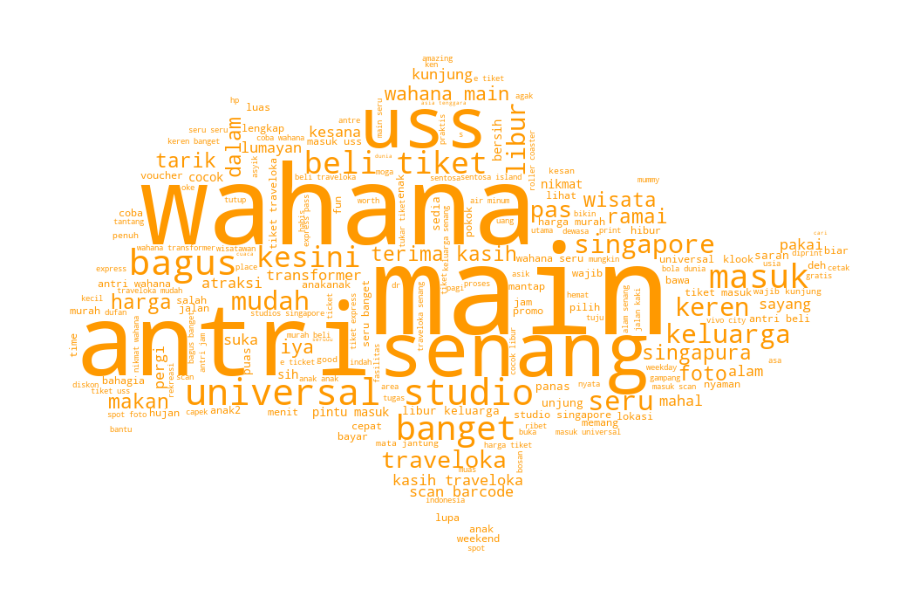


Universal Studios Singapore Top 15 Words Overall



Universal Studios Singapore Positive Wordcloud


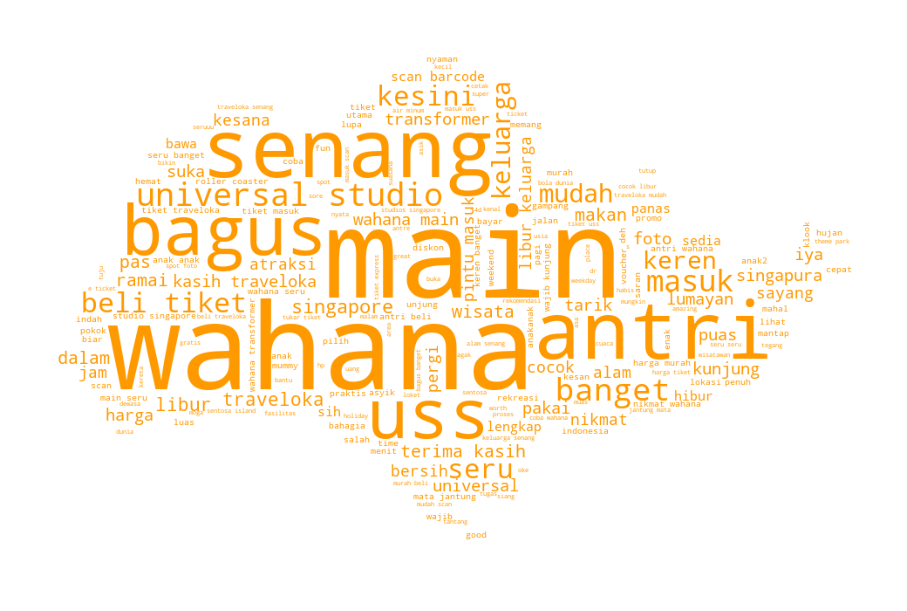


Universal Studios Singapore Top 15 Positive Words



Universal Studios Singapore Neutral Wordcloud


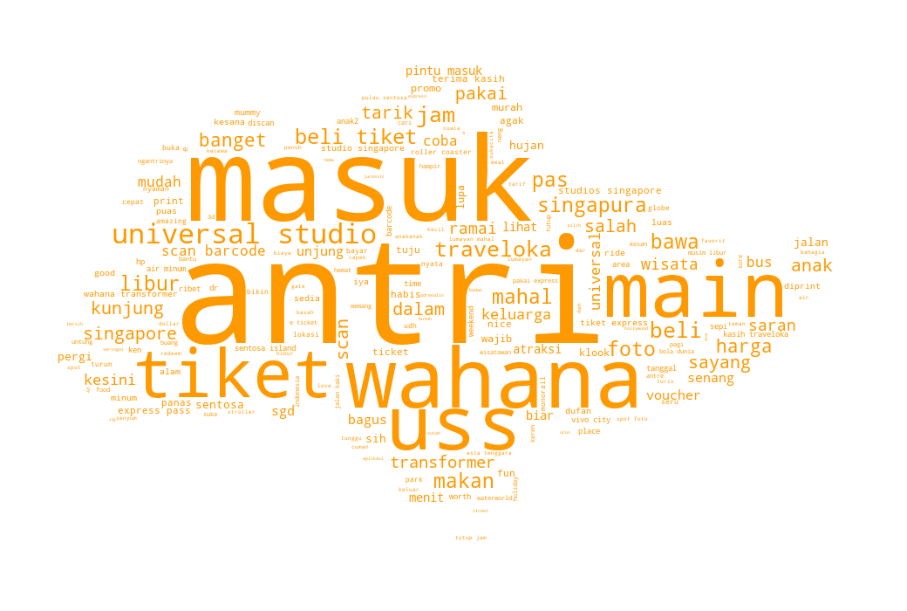


Universal Studios Singapore Top 15 Neutral Words



Universal Studios Singapore Negative Wordcloud


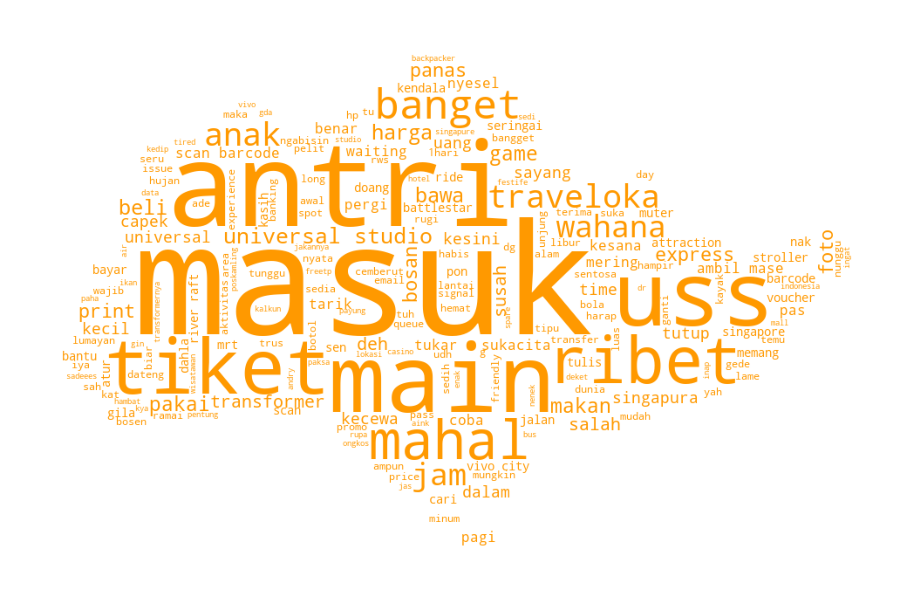


Universal Studios Singapore Top 15 Negative Words


In [4]:
af.show_visual(uss_df, "Universal Studios Singapore")

Adventure Cove


Adventure Cove Word Cloud


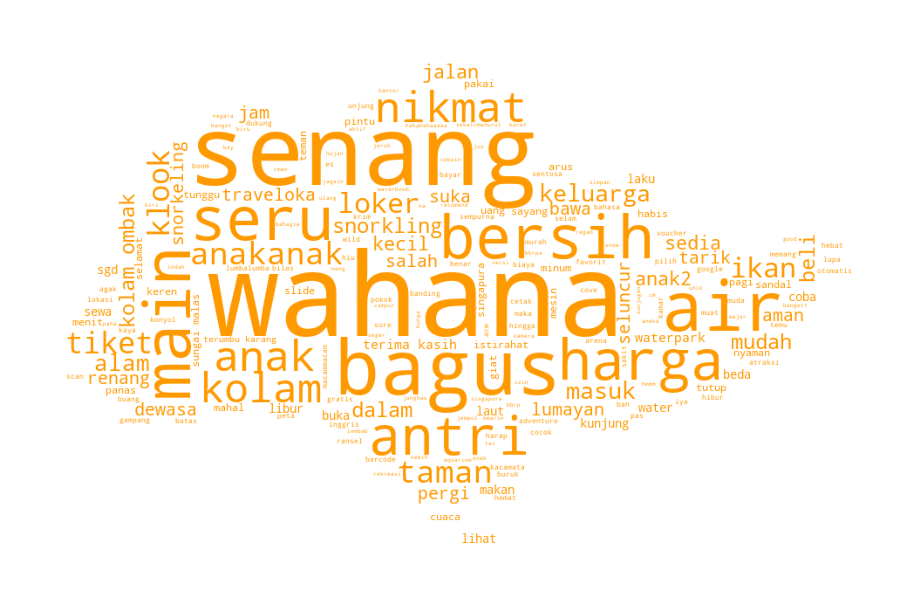


Adventure Cove Top 15 Words Overall



Adventure Cove Positive Wordcloud


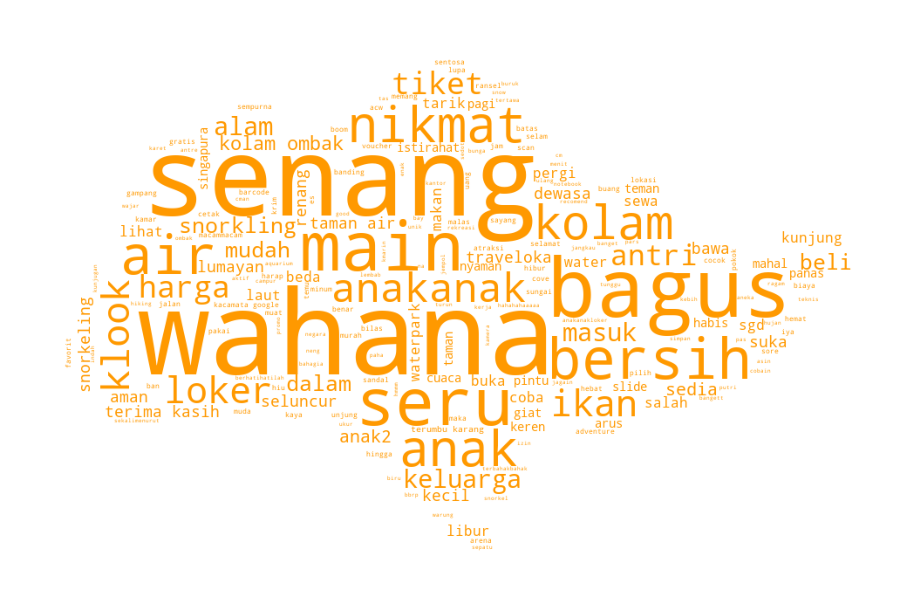


Adventure Cove Top 15 Positive Words



Adventure Cove Neutral Wordcloud


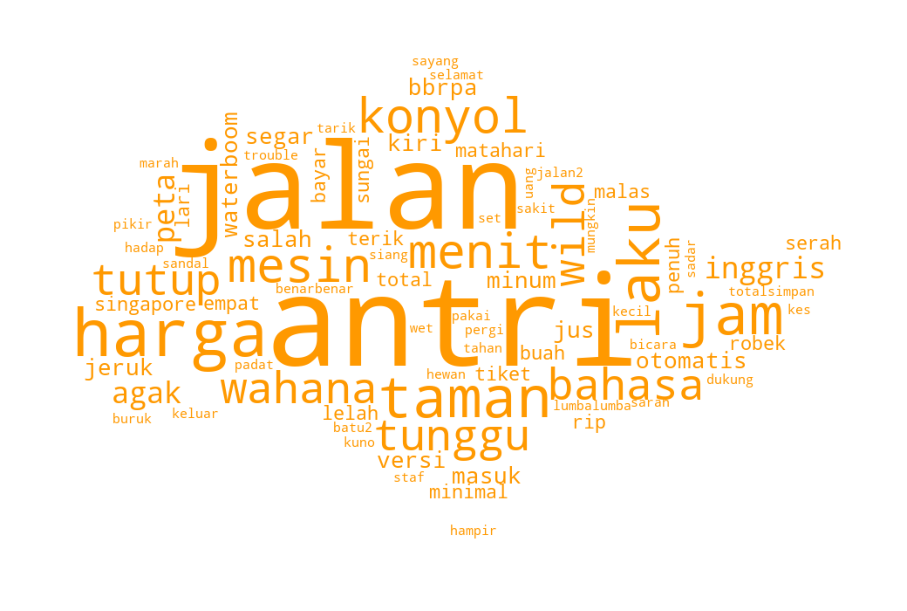


Adventure Cove Top 15 Neutral Words



Adventure Cove Negative Wordcloud


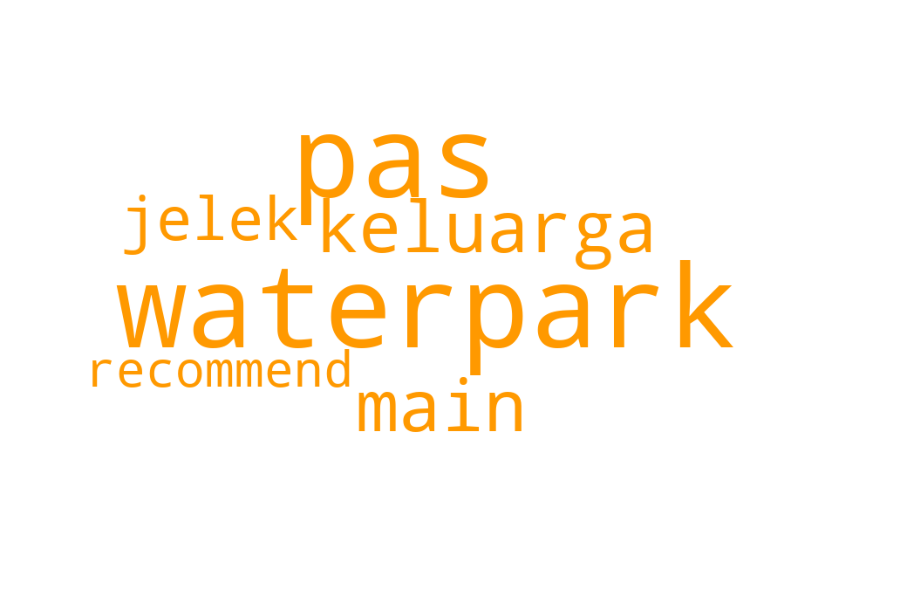


Adventure Cove Top 15 Negative Words


In [5]:
af.show_visual(ac_df, "Adventure Cove")

Beach Waterfront


Beach Waterfront Word Cloud


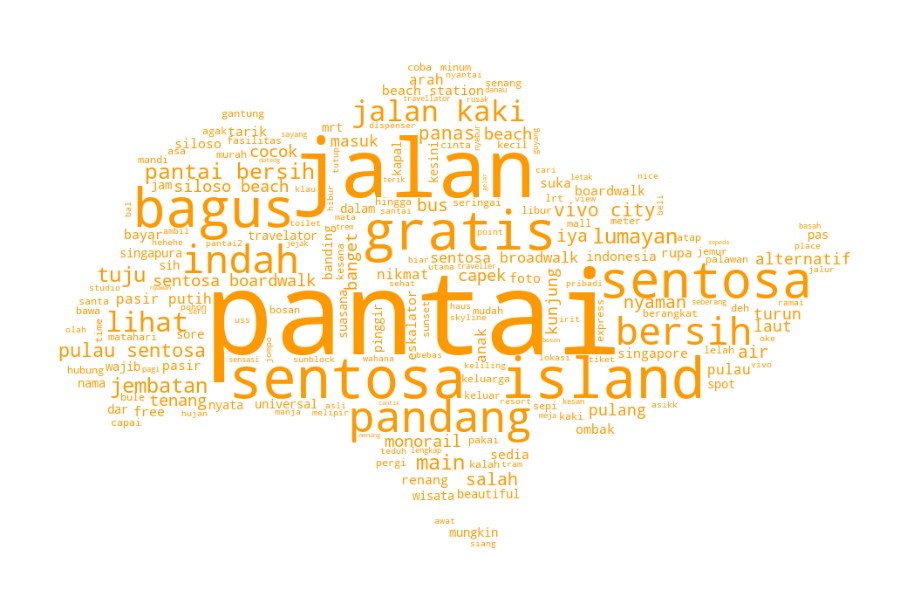


Beach Waterfront Top 15 Words Overall



Beach Waterfront Positive Wordcloud


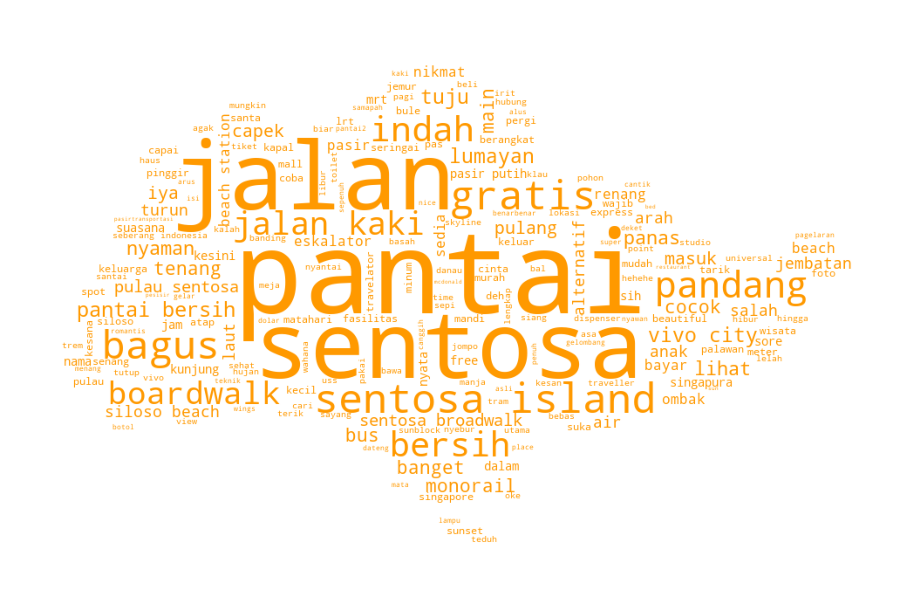


Beach Waterfront Top 15 Positive Words



Beach Waterfront Neutral Wordcloud


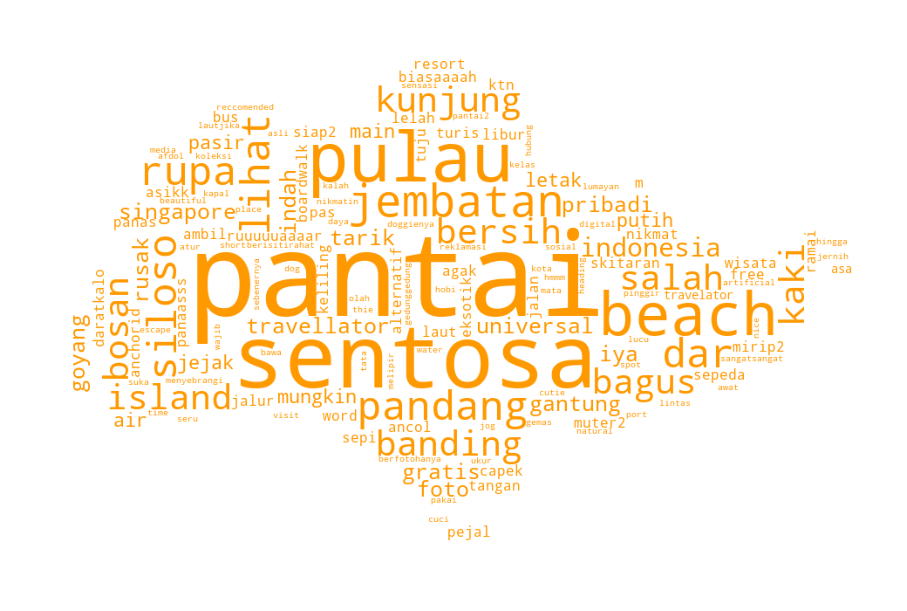


Beach Waterfront Top 15 Neutral Words



Beach Waterfront Negative Wordcloud


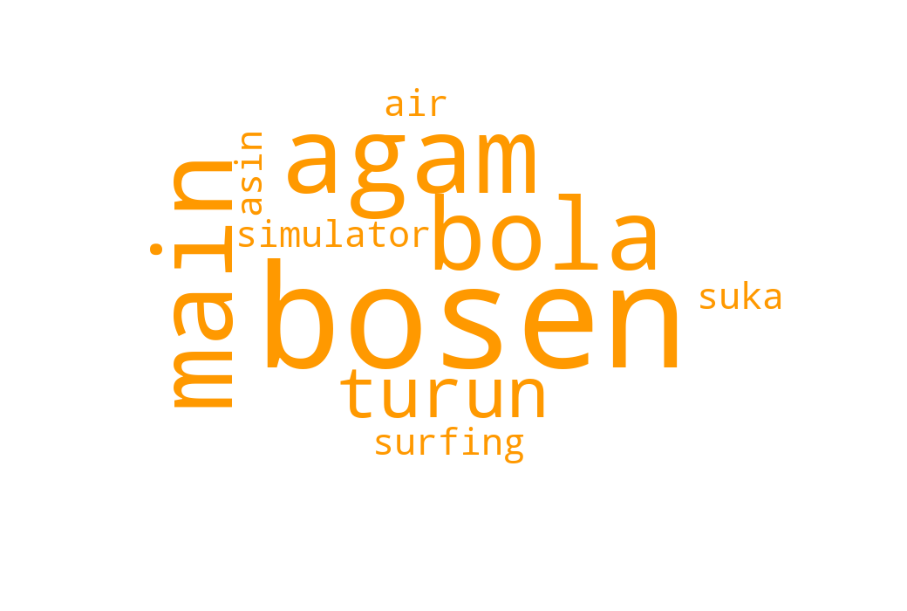


Beach Waterfront Top 15 Negative Words


In [6]:
af.show_visual(bw_df, "Beach Waterfront")

Cable Car


Cable Car Word Cloud


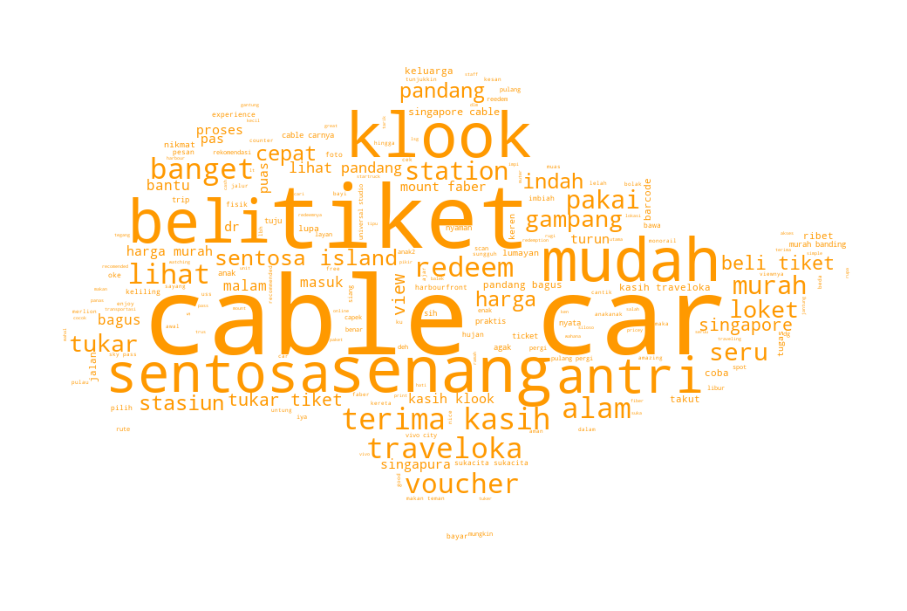


Cable Car Top 15 Words Overall



Cable Car Positive Wordcloud


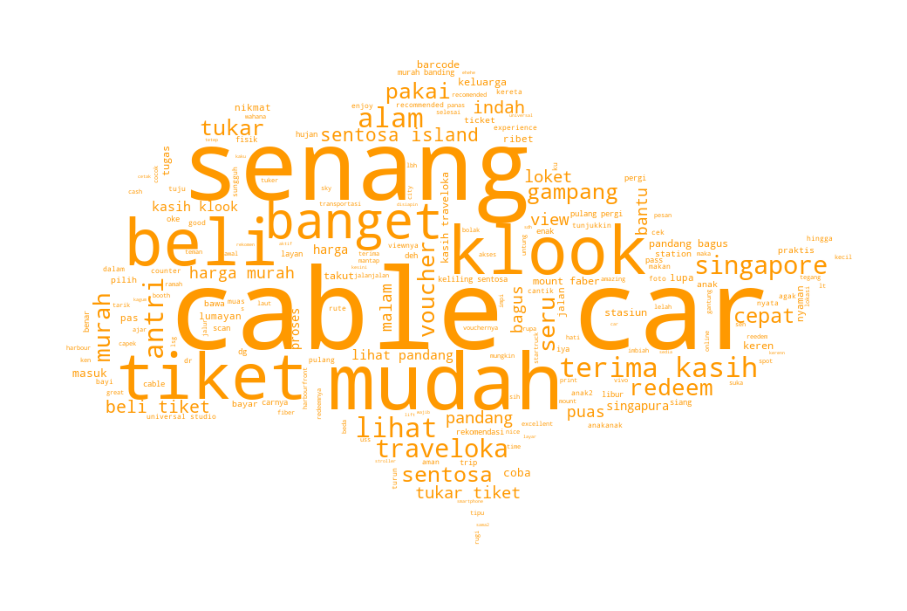


Cable Car Top 15 Positive Words



Cable Car Neutral Wordcloud


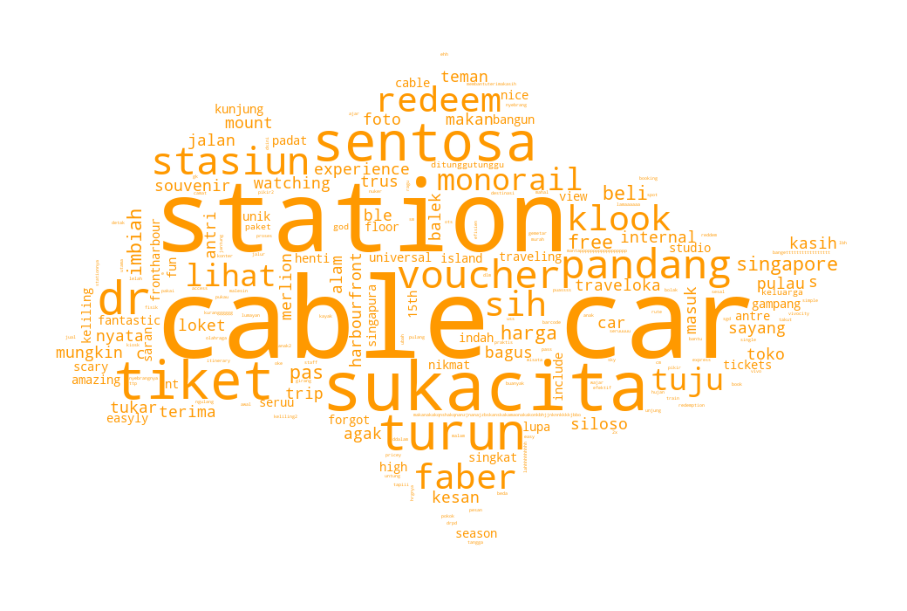


Cable Car Top 15 Neutral Words



Cable Car Negative Wordcloud


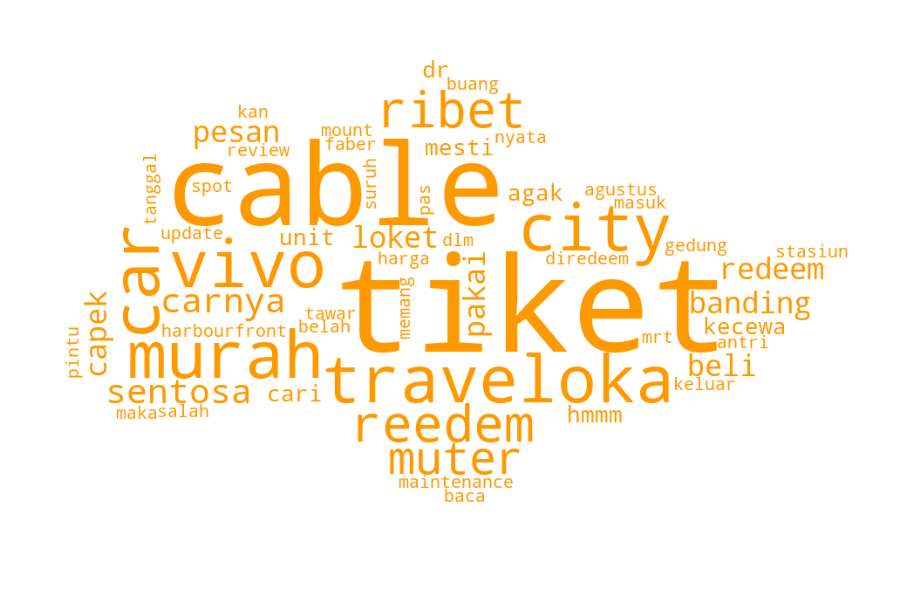


Cable Car Top 15 Negative Words


In [7]:
af.show_visual(cc_df, "Cable Car")

S.E.A Aquarium


SEA Aquarium Word Cloud


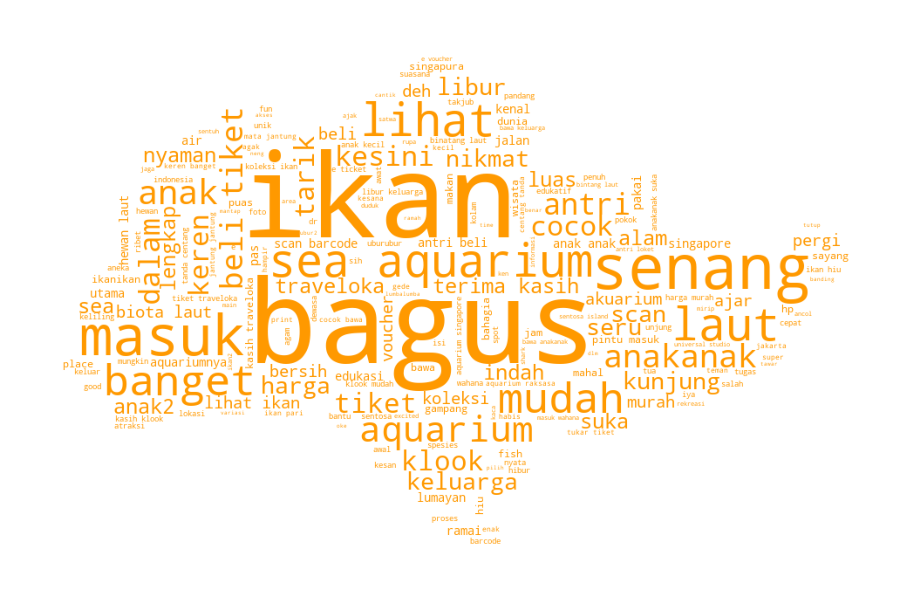


SEA Aquarium Top 15 Words Overall



SEA Aquarium Positive Wordcloud


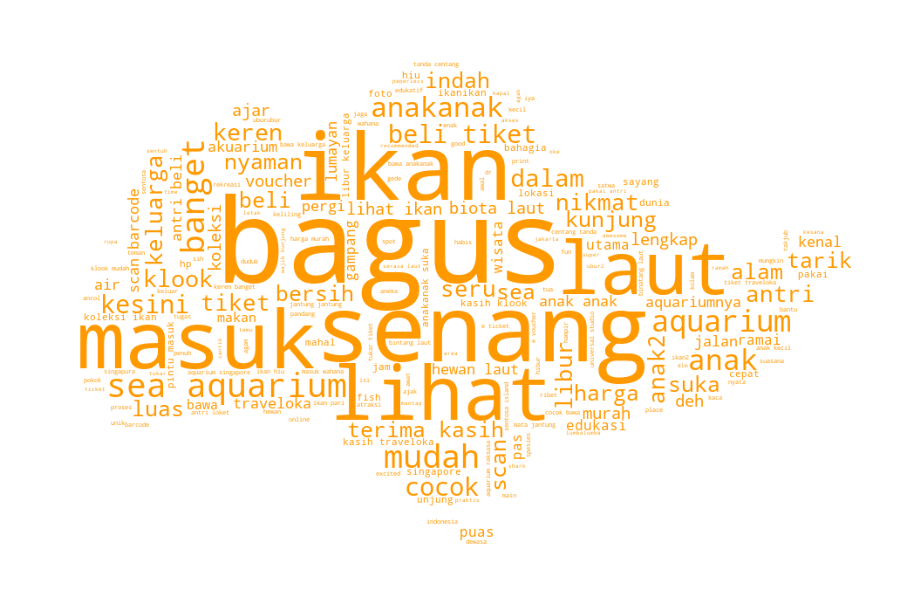


SEA Aquarium Top 15 Positive Words



SEA Aquarium Neutral Wordcloud


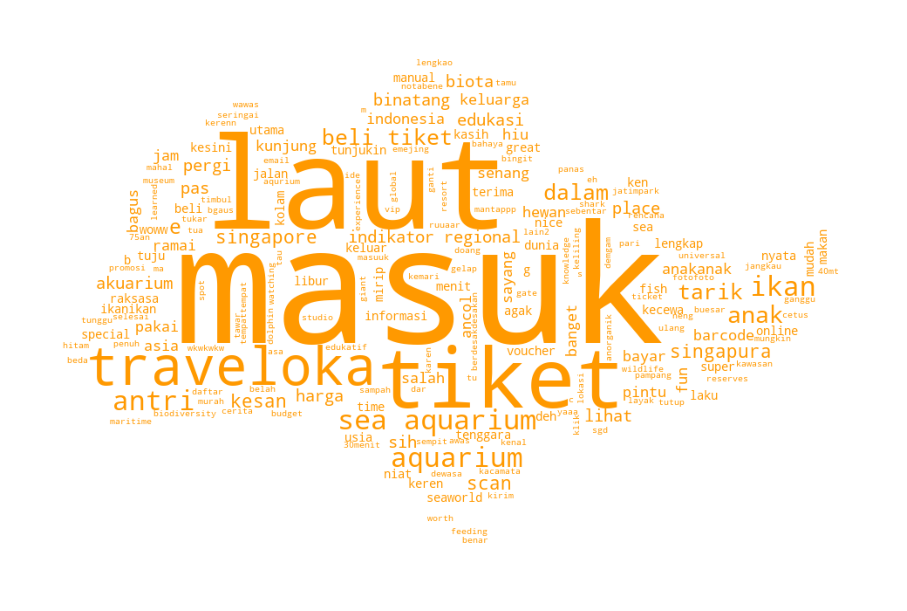


SEA Aquarium Top 15 Neutral Words



SEA Aquarium Negative Wordcloud


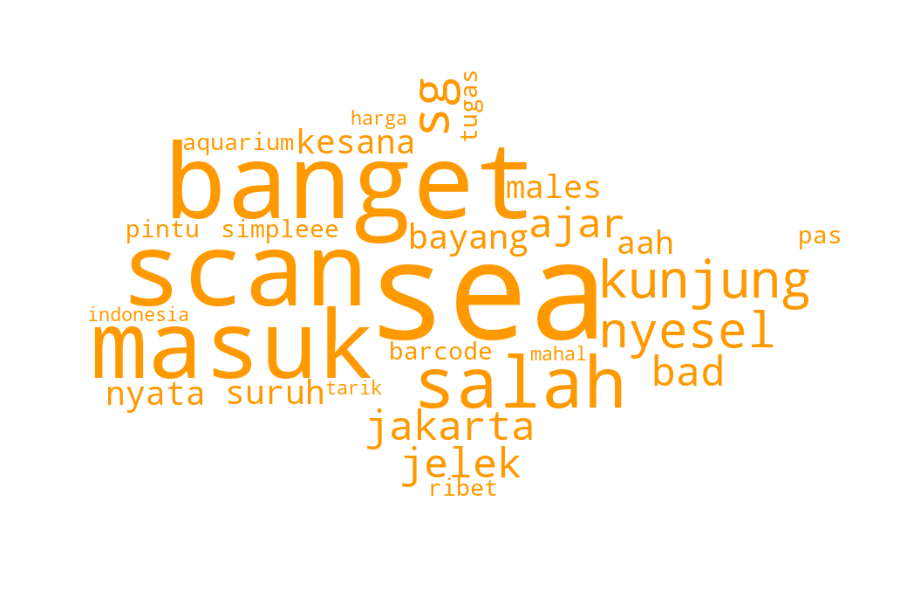


SEA Aquarium Top 15 Negative Words


In [8]:
af.show_visual(sa_df, "SEA Aquarium")

Skyline Luge


Skyline Luge Word Cloud


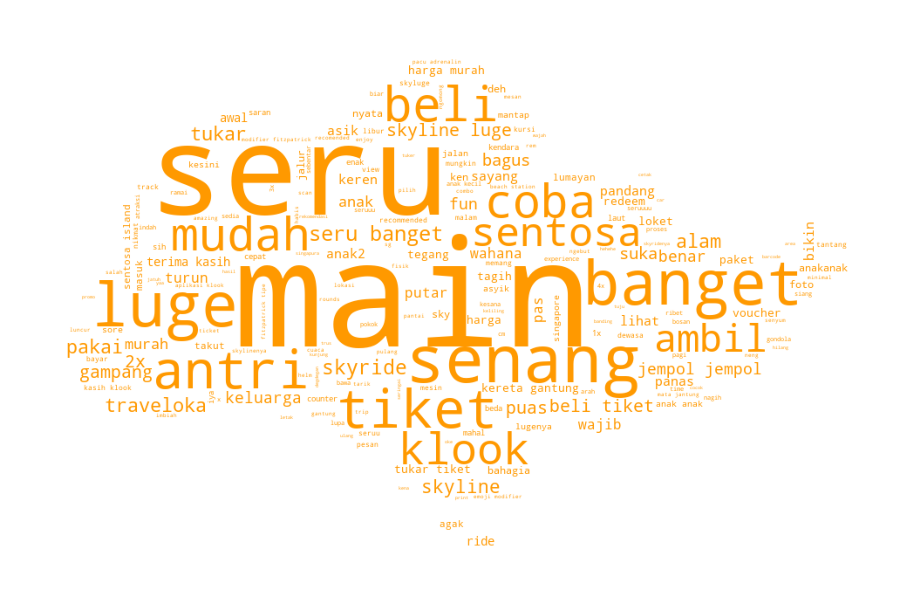


Skyline Luge Top 15 Words Overall



Skyline Luge Positive Wordcloud


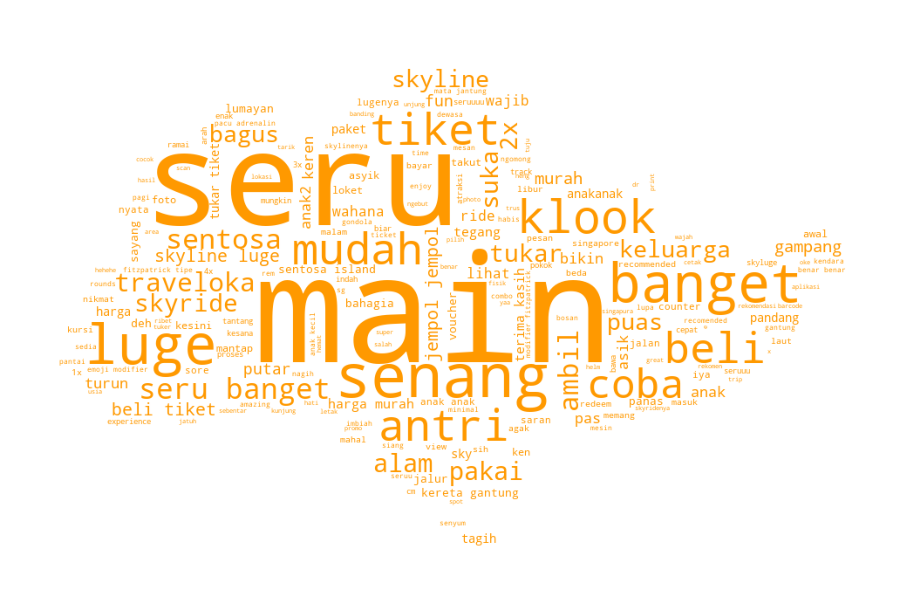


Skyline Luge Top 15 Positive Words



Skyline Luge Neutral Wordcloud


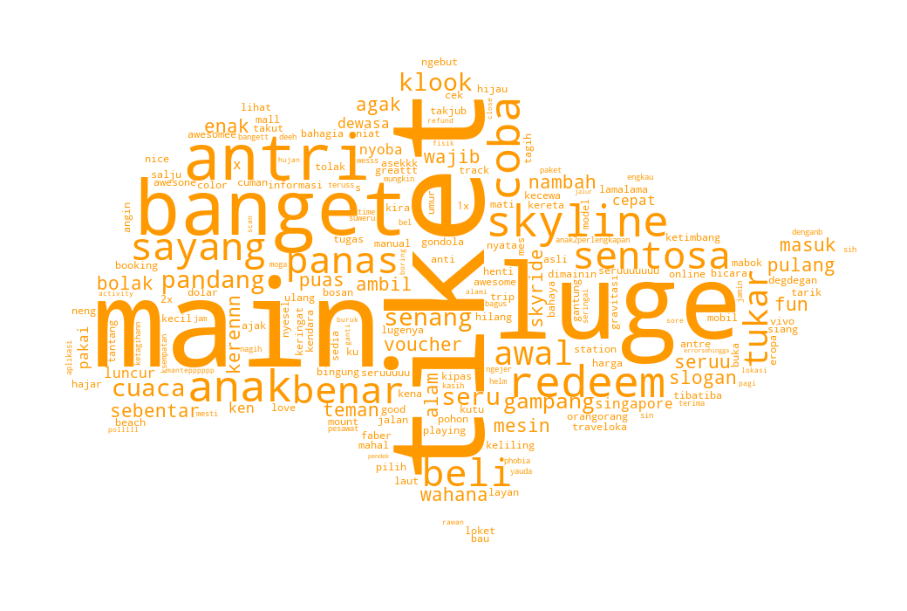


Skyline Luge Top 15 Neutral Words



Skyline Luge Negative Wordcloud


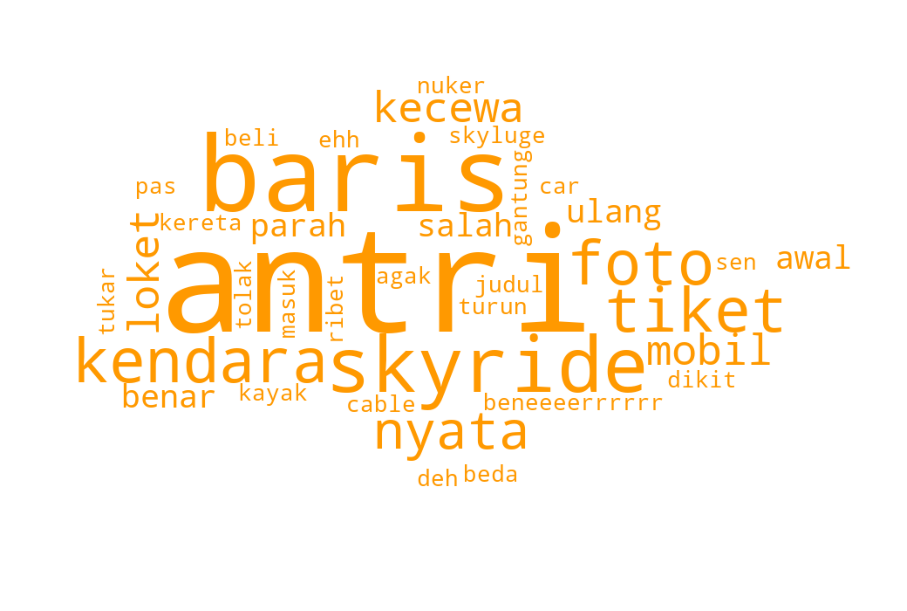


Skyline Luge Top 15 Negative Words


In [9]:
af.show_visual(sl_df, "Skyline Luge")

Wings of Time


Wings of Time Word Cloud


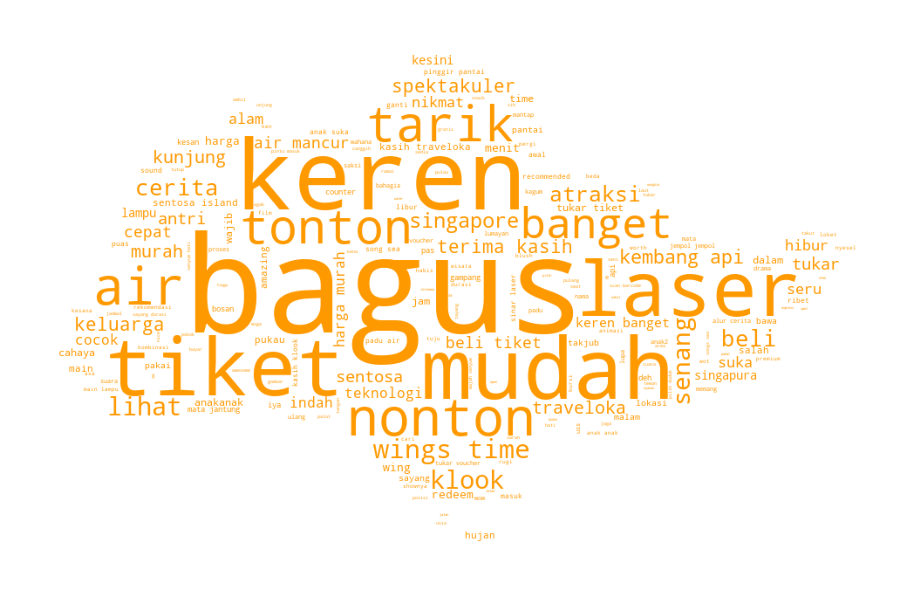


Wings of Time Top 15 Words Overall



Wings of Time Positive Wordcloud


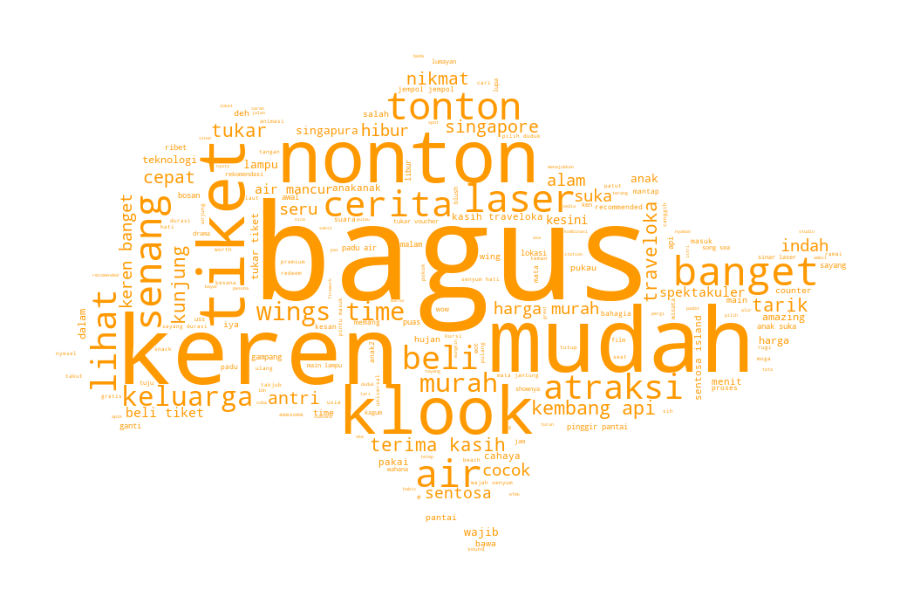


Wings of Time Top 15 Positive Words



Wings of Time Neutral Wordcloud


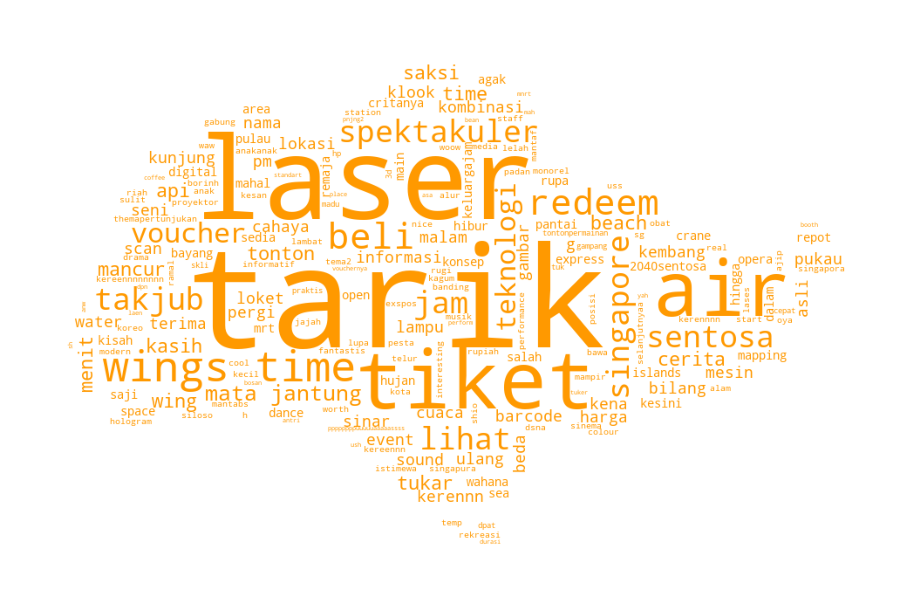


Wings of Time Top 15 Neutral Words



Wings of Time Negative Wordcloud


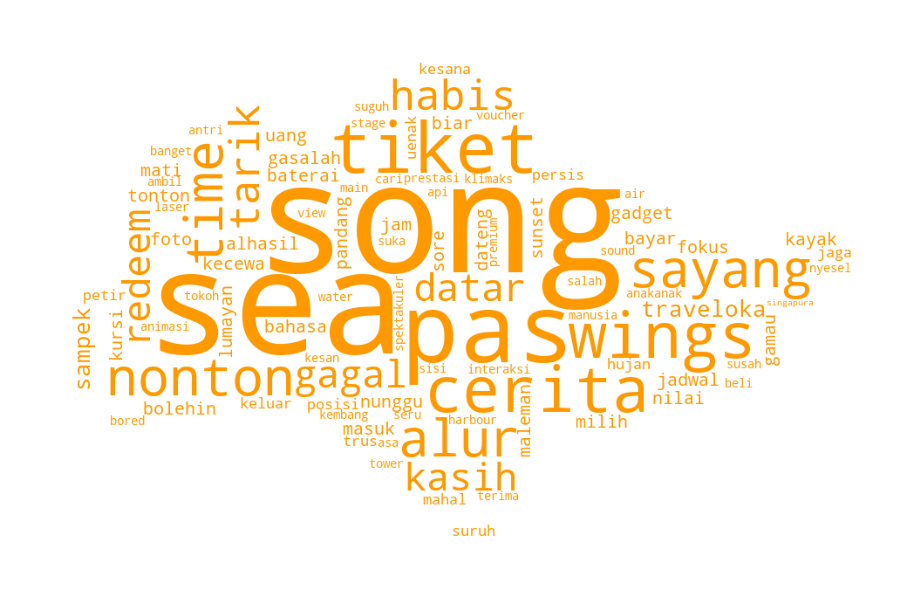


Wings of Time Top 15 Negative Words


In [10]:
af.show_visual(wot_df, "Wings of Time")